# **Improving the Region Model in a Destination Recommender System**

- In this Python notebook, I've presented code snippets utilized throughout the duration of this project. 
- Relevant data and resulting files are available within the associated directories.

### **1. Data Collection**

##### **Remarks - DBpedia**:
- DBpedia restricts the maximum returned results to 10,000 per single call. Thus, to obtain all data related to specified attributes, one must incorporate the keywords "LIMIT" and "OFFSET" in their queries. By using these keywords, we can iterate through queries until all entities for the given attribute are retrieved.

- The "LIMIT" keyword specifies the maximum number of results to be returned in a single query.

- The "OFFSET" keyword determines the starting point within the result set from which the results will be returned.

##### **Remarks - Open Street Map(OSM)**:
- Using the Overpass API, we can access OpenStreetMap data. The Overpass API allows us to query for data based on country codes. These country codes are requested in ISO-2 format.


In [1]:
import csv
from SPARQLWrapper import SPARQLWrapper, JSON
import overpass
import pandas as pd

##### **Architecture Data using DBpedia**

In [2]:
# DBpedia SPARQL endpoint
sparql = SPARQLWrapper("http://dbpedia.org/sparql")

# SPARQL query
query = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>

SELECT ?subject ?label ?type ?latitude ?longitude
WHERE {
  ?subject a ?type ;
           rdfs:label ?label ;
           geo:lat ?latitude ;
           geo:long ?longitude .
  FILTER (?type = dbo:Castle || 
          ?type = dbo:HistoricBuilding || 
          ?type = dbo:Museum || 
          ?type = dbo:ReligiousBuilding || 
          ?type = dbo:Skyscraper || 
          ?type = dbo:Pyramid)
  FILTER (LANG(?label) = 'en')
}
LIMIT 100000
"""

# Set the SPARQL query and return format 
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

# Execute the query and parse the results
results = sparql.query().convert()

# Save results into csv file
with open('architecture.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    
    # Csv header
    csv_writer.writerow(["entity", "label", "latitude", "longitude"])

    # Write each row of the results
    for result in results["results"]["bindings"]:
        subject = result["subject"]["value"]
        label = result["label"]["value"]
        latitude = result["latitude"]["value"]
        longitude = result["longitude"]["value"]
        csv_writer.writerow([subject, label, latitude, longitude])

print("CSV file created successfully.")

CSV file created successfully.


##### **Entertainment Data using DBpedia**

In [6]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql")

query = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>

SELECT ?subject ?label ?type ?latitude ?longitude
WHERE {
  ?subject a ?type ;
           rdfs:label ?label ;
           geo:lat ?latitude ;
           geo:long ?longitude .
  FILTER (?type = dbo:Castle || 
          ?type = dbo:HistoricBuilding || 
          ?type = dbo:Museum || 
          ?type = dbo:ReligiousBuilding || 
          ?type = dbo:Skyscraper || 
          ?type = dbo:Pyramid)
  FILTER (LANG(?label) = 'en')
}

LIMIT 10000
OFFSET 10000
"""

sparql.setQuery(query)
sparql.setReturnFormat(JSON)

results = sparql.query().convert()

with open('entertainment.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["entity", "label", "latitude", "longitude"])

    for result in results["results"]["bindings"]:
        subject = result["subject"]["value"]
        label = result["label"]["value"]
        latitude = result["latitude"]["value"]
        longitude = result["longitude"]["value"]
        csv_writer.writerow([subject, label, latitude, longitude])

print("CSV file created successfully.")

CSV file created successfully.


##### **Nature Data using DBpedia**

In [8]:
sparql = SPARQLWrapper("http://dbpedia.org/sparql")

query = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>

SELECT ?subject ?label ?type ?latitude ?longitude
WHERE {
  ?subject a ?type ;
           rdfs:label ?label ;
           geo:lat ?latitude ;
           geo:long ?longitude .
  FILTER (?type = dbo:NaturalPlace)
  FILTER (LANG(?label) = 'en')
}

LIMIT 10000
OFFSET 10000
"""

sparql.setQuery(query)
sparql.setReturnFormat(JSON)

results = sparql.query().convert()

with open('nature.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["entity", "label", "latitude", "longitude"])

    for result in results["results"]["bindings"]:
        subject = result["subject"]["value"]
        label = result["label"]["value"]
        latitude = result["latitude"]["value"]
        longitude = result["longitude"]["value"]
        csv_writer.writerow([subject, label, latitude, longitude])

print("CSV file created successfully.")

CSV file created successfully.


##### **Beaches Data using OpenStreetView Overpass API**

In [10]:
def get_number_of_beaches(country_code):
    api = overpass.API()

    # Overpass query to get the number of beaches in a specific country
    overpass_query = f"""
        area["ISO3166-1"="{country_code}"]["admin_level"="2"];
        (
            node["natural"="beach"](area);
            way["natural"="beach"](area);
            relation["natural"="beach"](area);
        );
        out;
    """

    try:
        result = api.get(overpass_query)
        beaches_count = len(result["features"])
        print(f"Number of beaches in {country_code}: {beaches_count}")

    except Exception as e:
        print(f"Error for {country_code}: {str(e)}")

In [13]:
country_code = "IT"
get_number_of_beaches(country_code)

Number of beaches in IT: 484


##### **Shopping Data using OpenStreetView Overpass API**

In [14]:
def get_number_of_shopping_malls(country_code):
    api = overpass.API()

    # Overpass query to get the number of beaches in a specific country
    overpass_query = f"""
        area["ISO3166-1"="{country_code}"]["admin_level"="2"];
        (
            node["shop"="mall"](area);
            way["shop"="mall"](area);
            relation["shop"="mall"](area);
        );
        out;
    """

    try:
        result = api.get(overpass_query)
        beaches_count = len(result["features"])
        print(f"Number of shopping malls in {country_code}: {beaches_count}")

    except Exception as e:
        print(f"Error for {country_code}: {str(e)}")

In [15]:
country_code = "CA"
get_number_of_shopping_malls(country_code)

Number of shopping malls in CA: 86


##### **Wintersport Data using OpenStreetView Overpass API**

In [31]:
def get_number_of_winter_sports_facilities(country_code):
    api = overpass.API()

    # Overpass query to get winter sports facilities in a specific country
    overpass_query = f"""
        area["ISO3166-1"="{country_code}"]["admin_level"="2"];
        (
            node["sport"="skiing"](area);
            way["sport"="skiing"](area);
            relation["sport"="skiing"](area);
            node["sport"="snowboarding"](area);
            way["sport"="snowboarding"](area);
            relation["sport"="snowboarding"](area);
        );
        out ;
    """

    try:
        result = api.get(overpass_query)
        total_count = len(result["features"])
        print(f"Total number of winter sports facilities in {country_code}: {total_count}")

    except Exception as e:
        print(f"Error retrieving data for {country_code}: {str(e)}")

In [32]:
country_code = "TR"
get_number_of_winter_sports_facilities(country_code)

Total number of winter sports facilities in TR: 22


##### **Sustainable Data using Sustainable Development Report (SDR)**

- Data Access: Data from the Sustainable Development Report 2023 with indicators can be accessed at the following link: [https://sdg-transformation-center-sdsn.hub.arcgis.com/datasets/sdsn::sustainable-development-report-2023-with-indicators/explore?showTable=true](https://sdg-transformation-center-sdsn.hub.arcgis.com/datasets/sdsn::sustainable-development-report-2023-with-indicators/explore?showTable=true). 

- It is available in various formats including CSV, GeoJSON, and more for download.

##### **Hiking Data using HikingProject**

- Data accessed from https://www.hikingproject.com is utilized to compare travel regions based on the number of hiking paths available.

##### **Culinary Data using TasteAtlas**

- Data accessed from "https://www.tasteatlas.com/best/cuisines" is utilized for culinary data ratings, which are employed to compare different cuisines.

### **2. Mapping Collected Data to Exisiting DestriRec Region**

- DestriRec geographic data was created previously and is stored on the frontend server in a file named **regions.json**.

- Within this file, the **u_name** field contains the region name, and  **geometry** field that corresponds to the geographic coordinates of the travel region.

- As discussed in Section 1 - Data Collection, some of the data has been gathered using country names. Therefore, it's important to note that certain regions in DestriRec are created by merging countries. Hence, during the course of this project, the **destirec_region_countries.csv** file has been created to present the travel region along with the corresponding countries or country names.

- For the data that includes coordinate information, such as nature, architecture, etc., these entities can be easily checked to see if their coordinates fall within the designated travel region.

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import StringType
import geopandas as gpd
from shapely.geometry import Point
import json
import os

- Naming can be changed according to the attribute that has been processed.

- **DATA_PATH** excepts the output from Section-1 project. In other words, for the nature attribute, it requires a CSV file with coordinate information so that it can be mapped into the related travel region.

- If the collected data does not include coordinate information such as wintersport, culinary, hiking etc. , we utilize the capital city coordinates of the countries to which the entities belong. In this case, the countries of the collected data are known, allowing us to assign entities to the relevant travel region before proceeding with the processing.

In [8]:
CURRENT_DIR = os.getcwd()
REGIONS_FILE = os.path.join(CURRENT_DIR,"regions.json")
DATA_PATH = os.path.join(CURRENT_DIR, "nature.csv") # Resulting data from Section-1
PROCESS_NAME ="nature_data_merge_combine"
OUTPUT_FILE_NAME="nature_destirec.csv"

In [ ]:
# Start Spark Session
spark = SparkSession.builder.appName(PROCESS_NAME).config("spark.memory.offHeap.enabled","true").config("spark.memory.offHeap.size","10g").getOrCreate()

# Read data
df = spark.read.csv(DATA_PATH,header=True,escape="\"")
df.show(5,0)

In [ ]:
# Read regions.json 
with open(REGIONS_FILE, "r") as file:
    geojson_data = json.load(file)
    
# Convert into GeoDataFrame 
gdf = gpd.GeoDataFrame.from_features(geojson_data["features"])
gdf.head()

In [ ]:
# Check if a point is inside any of the polygons
def assing_to_travel_region(latitude, longitude):
    point = Point(longitude, latitude)
    for index, row in gdf.iterrows():
        if row['geometry'].contains(point):
            return row['u_name']
        
# Register the function as a UDF
get_u_name_udf = spark.udf.register("assing_to_travel_region", assing_to_travel_region)

In [ ]:
# Add a new column 'u_name' to the PySpark DataFrame using the UDF
df_rows_with_u_name = df.withColumn("u_name", assing_to_travel_region(col("latitude"), col("longitude")))
df_rows_with_u_name.show()

In [ ]:
# Count the number of rows for each u_name
count_per_u_name = df_rows_with_u_name.groupBy("u_name").count()
count_per_u_name.show()

In [ ]:
# Save the DataFrame as a CSV file
count_per_u_name.write.csv(OUTPUT_FILE_NAME, header=True, mode="overwrite")

### **3. Processed Data**

- The collected and processed data is presented inside the **data directory**.

### **4. Updating DestiRec Region Labels with Newly Collected Data**

- Currently, all data related to attributes has been gathered, and the complete table is available in **data.csv**. 

- Before assigning labels based on the newly collected data, it's uselful to understand the underlying distribution.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot (x_column, y_column, x_label, y_label, title):
    x_labels = x_column.astype(str)

    # Plot size 
    plt.figure(figsize=(10, 6))
    
    # Plot bar chart
    plt.bar(x_labels, y_column)

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Adjusting labels
    plt.xticks(rotation=90, ha='right')
    plt.tick_params(axis='x', labelsize=5) 
 
    # Show plot
    plt.tight_layout()
    plt.show()

In [12]:
DATA = pd.read_csv("data.csv") # File name is data.csv
DATA.head()

,u_name,architecture,entertainment,nature,count_beaches,count_shops,count_wintersports,mean_culinary,mean_sustainability,count_hiking
0,HTI,68,80.0,352.0,485.0,347.0,0.0,4.0075,64.767527,64.0
1,IDN_SU,168,104.0,193.0,1183.0,1437.0,1.0,4.5700,70.162897,14.0
2,POL,386,115.0,437.0,2990.0,1797.0,141.0,4.5000,81.800176,2.0
3,USA_TX,233,346.0,250.0,180.0,536.0,10.0,4.4800,75.914397,2603.0
4,ZMB,6,8.0,33.0,48.0,97.0,0.0,4.2000,55.289931,1.0


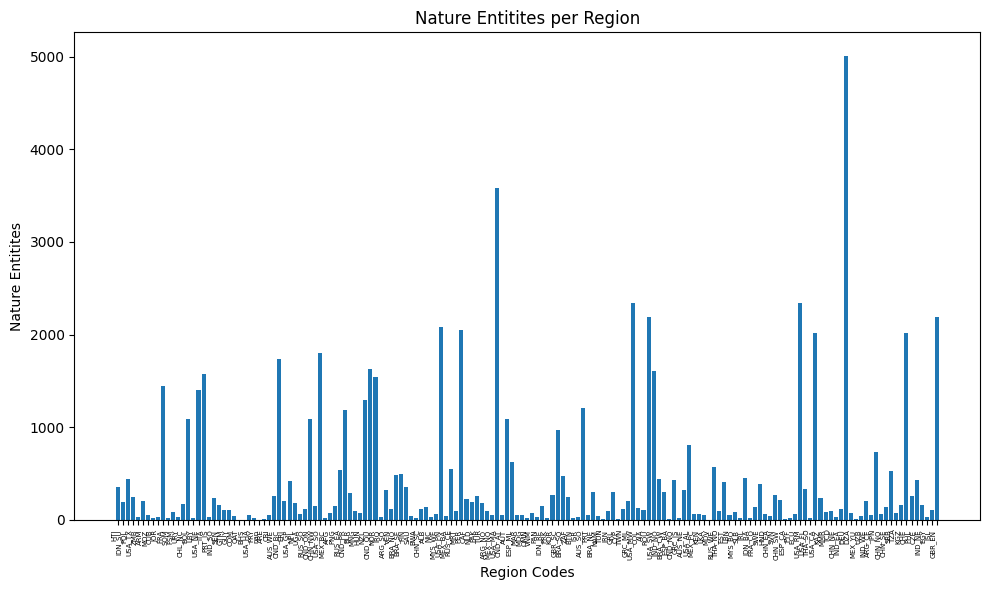

In [17]:
x_column = DATA['u_name']
x_label = 'Region Codes'

# It can be changed to match your desired attribute (must correspond to the column name in the dataset a.k.a DATA)
attribute_name = "nature" 
y_column = DATA[attribute_name]
y_label = f'{attribute_name.capitalize()} Entitites'
title = f'{attribute_name.capitalize()} Entitites per Region'

plot(x_column, y_column,x_label, y_label, title)

- Using the plot() function above, it becomes evident that certain attributes: nature, architecture, beaches, winter sports, entertainment, shopping, and hiking exhibit a skewed distribution. While some regions possess a large number of entities associated with these attributes, a larger number of regions have fewer architecture entities, resulting in esulting in skewed data.
- Culinary and sustanability results in relatively balance distibution.

- The skewed distributed attributes (nature, architecture, entairtainment, beaches, winter sport, hiking, shopping) is converted to a log scale. Labels are then assigned using the 20% quartile.

In [11]:
# List of columns to take the log
columns_to_log = ['architecture', 'entertainment', 'nature','count_beaches',
                  'count_shops','count_hiking', 'count_wintersports']

# Log-transformation on selected columns
DATA[columns_to_log] = np.log1p(DATA[columns_to_log])

percentiles = [0, 20, 40, 60, 80, 100]

# Calculate the corresponding quantiles for each column
quantiles = DATA[columns_to_log].quantile(np.array(percentiles) / 100)

# Assign buckets based on quantiles
for column in columns_to_log:
    bucket_column_name = f'{column}_bucket'
    DATA[bucket_column_name] = pd.cut(DATA[column], bins=quantiles[column], labels=False, right=False, duplicates='drop')
    
# Replace NaN values with 0
columns_to_replace = ['architecture_bucket', 'entertainment_bucket', 'nature_bucket',
                      "count_beaches_bucket","count_shops_bucket", "count_hiking_bucket"]
DATA[columns_to_replace] = DATA[columns_to_replace].fillna(0)

DATA.head()

,u_name,architecture,entertainment,nature,count_beaches,count_shops,count_wintersports,mean_culinary,mean_sustainability,count_hiking,architecture_bucket,entertainment_bucket,nature_bucket,count_beaches_bucket,count_shops_bucket,count_hiking_bucket,count_wintersports_bucket
0,HTI,0.681337,0.687038,0.729411,0.736824,0.729068,0.000000,4.0075,64.767527,0.679143,2.0,3.0,3.0,2.0,2.0,2.0,0.0
1,IDN_SU,0.710159,0.695726,0.714025,0.755107,0.758705,0.526589,4.5700,70.162897,0.608388,3.0,3.0,2.0,3.0,4.0,1.0,0.0
2,POL,0.731595,0.698899,0.734468,0.771219,0.762690,1.784370,4.5000,81.800176,0.441230,4.0,4.0,3.0,4.0,4.0,0.0,2.0
3,USA_TX,0.719076,0.728999,0.720908,0.712098,0.739038,1.223156,4.4800,75.914397,0.768968,3.0,4.0,3.0,1.0,3.0,3.0,1.0
4,ZMB,0.549605,0.571637,0.652455,0.668197,0.693478,0.000000,4.2000,55.289931,0.352793,0.0,0.0,1.0,0.0,1.0,0.0,0.0


- Culinary and sustainability attributes are directly assigned labels using the 20% quantile.

In [12]:
# For the remaining columns, distribution is balanced so don't need to take the log
other_columns = ['mean_sustainability', 'mean_culinary']

percentiles = [0, 20, 40, 60, 80, 100]

# Calculate the corresponding quantiles for each column
quantiles = DATA[other_columns].quantile(np.array(percentiles) / 100)

# Assign buckets based on quantiles
for column in other_columns:
    bucket_column_name = f'{column}_bucket'
    DATA[bucket_column_name] = pd.cut(DATA[column], bins=quantiles[column], labels=False, right=False, duplicates='drop')
    
# Replace NaN values with 0
columns_to_replace = ['mean_sustainability_bucket',"mean_culinary_bucket"]
DATA[columns_to_replace] = DATA[columns_to_replace].fillna(0)

DATA.head()

,u_name,architecture,entertainment,nature,count_beaches,count_shops,count_wintersports,mean_culinary,mean_sustainability,count_hiking,architecture_bucket,entertainment_bucket,nature_bucket,count_beaches_bucket,count_shops_bucket,count_hiking_bucket,count_wintersports_bucket,mean_sustainability_bucket,mean_culinary_bucket
0,HTI,0.681337,0.687038,0.729411,0.736824,0.729068,0.000000,4.0075,64.767527,0.679143,2.0,3.0,3.0,2.0,2.0,2.0,0.0,0.0,1.0
1,IDN_SU,0.710159,0.695726,0.714025,0.755107,0.758705,0.526589,4.5700,70.162897,0.608388,3.0,3.0,2.0,3.0,4.0,1.0,0.0,1.0,4.0
2,POL,0.731595,0.698899,0.734468,0.771219,0.762690,1.784370,4.5000,81.800176,0.441230,4.0,4.0,3.0,4.0,4.0,0.0,2.0,4.0,3.0
3,USA_TX,0.719076,0.728999,0.720908,0.712098,0.739038,1.223156,4.4800,75.914397,0.768968,3.0,4.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0
4,ZMB,0.549605,0.571637,0.652455,0.668197,0.693478,0.000000,4.2000,55.289931,0.352793,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


- Resulting file is presented in **data_with_bucket_numbers.csv** file

- Convert bucket numbers into DestiRec label for compatability with existing application.

In [20]:
DATA = pd.read_csv("data_with_bucket_numbers.csv") # File name is data.csv

# Define the bucket values mapping
bucket_values_mapping = {
    0: '--',
    1: '-',
    2: 'o',
    3: '+',
    4: '++',
}

# Specify the list of columns with bucket numbers
bucket_columns = ['architecture_bucket', 'entertainment_bucket', 'nature_bucket',
                      "count_beaches_bucket","count_shops_bucket","count_wintersports_bucket",
                      "count_hiking_bucket", 'mean_sustainability_bucket',"mean_culinary_bucket"]

# Map bucket numbers to corresponding values
for column in bucket_columns:
    DATA[column.replace('_bucket', '_value')] = DATA[column].map(bucket_values_mapping)
    
DATA.head(10)

,u_name,architecture,entertainment,nature,count_beaches,count_shops,count_wintersports,mean_culinary,mean_sustainability,count_hiking,...,mean_culinary_bucket,architecture_value,entertainment_value,nature_value,count_beaches_value,count_shops_value,count_wintersports_value,count_hiking_value,mean_sustainability_value,mean_culinary_value
0,IDN_SU,5.129899,4.653960,5.267858,7.076654,7.271009,0.693147,4.570000,70.162897,2.708050,...,4.0,+,+,o,+,++,--,o,--,++
1,POL,5.958425,4.753590,6.082219,8.003363,7.494430,4.955827,4.500000,81.800176,1.098612,...,3.0,++,++,+,++,++,+,-,++,+
2,USA_TX,5.455321,5.849325,5.525453,5.198497,6.285998,2.397895,4.480000,75.914397,7.864804,...,3.0,+,++,+,-,+,-,++,+,+
3,ARM,6.313548,4.709530,5.298317,6.084499,5.552960,2.197225,4.116667,73.934221,4.672829,...,0.0,++,+,o,o,o,-,+,o,--
4,FRA,7.625595,5.863631,7.276556,9.055673,7.325149,5.863631,4.550000,82.048343,5.549076,...,4.0,++,++,++,++,++,++,++,++,++
5,FSM,2.484907,2.079442,4.442651,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,--,--,-,--,--,--,--,--,--
6,CHL_NC,3.871201,3.663562,5.135798,6.396930,6.086775,2.484907,4.420000,73.685219,3.931826,...,2.0,o,o,o,+,+,-,+,-,o
7,USA_NE,6.291569,5.897154,7.246368,8.278428,6.226537,4.262680,4.480000,75.914397,9.903538,...,3.0,++,++,++,++,+,o,--,+,+
8,ITA,7.466799,5.560682,7.364547,8.637462,7.458763,5.765191,4.650000,78.786836,5.609472,...,0.0,++,++,++,++,++,+,++,+,--
9,PRT_IS,2.995732,1.609438,3.526361,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-,--,--,--,--,--,--,--,--


- Results are presented in **data_with_bucket_labels.csv**

### **5. Comparison between the Newly Assigned DestiRec Labels and the Old Labels**

- Load previous data

In [46]:
# Load JSON data
with open("travelRegionsRaw.json", 'r') as json_file:
    data = json.load(json_file)

# Read JSON into a Pandas DataFrame
travelRegions_df = pd.json_normalize(data['regions'])
travelRegions_df.tail()

,ParentRegion,Region,u_name,costPerWeek,jan,feb,mar,apr,may,jun,...,nature,hiking,beach,watersports,entertainment,wintersports,culture,culinary,architecture,shopping
192,Southern Europe,"Spain, Canary islands",ESP_CA,350,+,+,+,++,++,++,...,o,o,+,o,+,--,o,o,o,-
193,Southern Europe,"Portugal, mainland",PRT,350,,,,,,,...,o,o,+,o,o,--,+,+,+,-
194,Southern Europe,"Portugal, islands",PRT_IS,350,,,,,,,...,+,+,+,+,o,--,+,o,o,-
195,Southern Europe,Turkey,TUR,350,,,,,,,...,o,o,+,o,o,o,++,+,+,o
196,Southern Europe,Cyprus,CYP,350,,,,,,,...,-,o,+,+,o,--,+,o,o,-


- Load new data and transform column names

In [48]:
# Load data
DATA = pd.read_csv("data_with_bucket_labels.csv")

DATA = DATA[["u_name","architecture_value","entertainment_value","nature_value",
                     "count_beaches_value","count_shops_value","count_hiking_value", "mean_culinary_value","count_wintersports_value"]]

# Rename new dataset column for comparsion
DATA.rename(columns={
    "architecture_value":"architecture",
    "entertainment_value":"entertainment",
    "nature_value":"nature",
    "count_beaches_value":"beach",
    "count_shops_value":"shopping",
    "count_hiking_value":"hiking",
    "mean_culinary_value" :"culinary",
    "count_wintersports_value":"wintersports"
}, inplace=True)

DATA.head(10)

,u_name,architecture,entertainment,nature,beach,shopping,hiking,culinary,wintersports
0,IDN_SU,+,+,o,+,++,o,++,--
1,POL,++,++,+,++,++,-,+,+
2,USA_TX,+,++,+,-,+,++,+,-
3,ARM,++,+,o,o,o,+,--,-
4,FRA,++,++,++,++,++,++,++,++
5,FSM,--,--,-,--,--,--,--,--
6,CHL_NC,o,o,o,+,+,+,o,-
7,USA_NE,++,++,++,++,+,--,+,o
8,ITA,++,++,++,++,++,++,--,+
9,PRT_IS,-,--,--,--,--,--,--,--


In [49]:
columns_to_compare =["architecture","entertainment","nature",
                     "beach","shopping","hiking","culinary","wintersports"]

# Merge DataFrames on the common column
comparision_df = pd.merge(DATA
                     , travelRegions_df, on="u_name", suffixes=('_df1', '_df2'), how='outer')

# Initialize a new column for differences
comparision_df['differences'] = ''

# Compare specified columns and record differences
for column in columns_to_compare:
    mask = comparision_df[f'{column}_df1'] != comparision_df[f'{column}_df2']
    comparision_df['differences'] += np.where(mask, f'{column} is different; ', '')

comparision_df.head(15)

,u_name,architecture_df1,entertainment_df1,nature_df1,beach_df1,shopping_df1,hiking_df1,culinary_df1,wintersports_df1,ParentRegion,...,hiking_df2,beach_df2,watersports,entertainment_df2,wintersports_df2,culture,culinary_df2,architecture_df2,shopping_df2,differences
0,IDN_SU,+,+,o,+,++,o,++,--,Indonesia,...,+,o,+,o,--,+,o,+,o,entertainment is different; nature is differen...
1,POL,++,++,+,++,++,-,+,+,Eastern Europe,...,-,-,-,o,--,o,o,o,o,architecture is different; entertainment is di...
2,USA_TX,+,++,+,-,+,++,+,-,USA,...,-,o,o,o,-,+,o,o,o,architecture is different; entertainment is di...
3,ARM,++,+,o,o,o,+,--,-,Russland and Caucasus,...,-,-,--,-,-,o,o,o,-,architecture is different; entertainment is di...
4,FRA,++,++,++,++,++,++,++,++,Central Europe,...,+,+,o,o,o,+,+,+,+,architecture is different; entertainment is di...
5,FSM,--,--,-,--,--,--,--,--,Pacific,...,-,++,+,-,--,+,o,--,-,entertainment is different; nature is differen...
6,CHL_NC,o,o,o,+,+,+,o,-,South America,...,o,--,-,o,--,+,o,o,o,nature is different; beach is different; shopp...
7,USA_NE,++,++,++,++,+,--,+,o,USA,...,+,-,o,o,o,+,+,+,-,architecture is different; entertainment is di...
8,ITA,++,++,++,++,++,++,--,+,Southern Europe,...,+,+,+,o,--,++,+,++,o,entertainment is different; nature is differen...
9,PRT_IS,-,--,--,--,--,--,--,--,Southern Europe,...,+,+,+,o,--,+,o,o,-,architecture is different; entertainment is di...


- Results are presented in **difference.csv**